# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


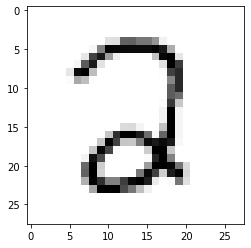

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2075
Training Accuracy: 0.8032, Testing Accuracy: 0.8216



Epoch 10, Loss 0.062
Training Accuracy: 0.9350, Testing Accuracy: 0.9456



Epoch 20, Loss 0.0433
Training Accuracy: 0.9528, Testing Accuracy: 0.9577



Epoch 30, Loss 0.0361
Training Accuracy: 0.9607, Testing Accuracy: 0.9667



Epoch 40, Loss 0.0322
Training Accuracy: 0.9639, Testing Accuracy: 0.9677



Epoch 50, Loss 0.0297
Training Accuracy: 0.9662, Testing Accuracy: 0.9698



Epoch 60, Loss 0.0279
Training Accuracy: 0.9685, Testing Accuracy: 0.9728



Epoch 70, Loss 0.0265
Training Accuracy: 0.9704, Testing Accuracy: 0.9728



Epoch 80, Loss 0.0253
Training Accuracy: 0.9715, Testing Accuracy: 0.9728



Epoch 90, Loss 0.0243
Training Accuracy: 0.9730, Testing Accuracy: 0.9733



Epoch 100, Loss 0.0235
Training Accuracy: 0.9738, Testing Accuracy: 0.9743



Epoch 110, Loss 0.0227
Training Accuracy: 0.9744, Testing Accuracy: 0.9748



Epoch 120, Loss 0.022
Training Accuracy: 0.9749, Testing Accuracy: 0.9753



Epoch 130, Loss 0.0214
Training Accuracy: 0.9759, Testing Accuracy: 0.9758



Epoch 140, Loss 0.0208
Training Accuracy: 0.9761, Testing Accuracy: 0.9763



Epoch 150, Loss 0.0202
Training Accuracy: 0.9766, Testing Accuracy: 0.9768



Epoch 160, Loss 0.0197
Training Accuracy: 0.9774, Testing Accuracy: 0.9768



Epoch 170, Loss 0.0192
Training Accuracy: 0.9776, Testing Accuracy: 0.9778



Epoch 180, Loss 0.0187
Training Accuracy: 0.9782, Testing Accuracy: 0.9778



Epoch 190, Loss 0.0182
Training Accuracy: 0.9791, Testing Accuracy: 0.9778



Epoch 200, Loss 0.0177
Training Accuracy: 0.9796, Testing Accuracy: 0.9773



Epoch 210, Loss 0.0173
Training Accuracy: 0.9806, Testing Accuracy: 0.9773



Epoch 220, Loss 0.0169
Training Accuracy: 0.9812, Testing Accuracy: 0.9768



Epoch 230, Loss 0.0165
Training Accuracy: 0.9820, Testing Accuracy: 0.9768



Epoch 240, Loss 0.0161
Training Accuracy: 0.9825, Testing Accuracy: 0.9778



0.0005755927427674246

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2237
Training Accuracy: 0.7419, Testing Accuracy: 0.7379



Epoch 10, Loss 0.1014
Training Accuracy: 0.9099, Testing Accuracy: 0.9173



Epoch 20, Loss 0.0787
Training Accuracy: 0.9252, Testing Accuracy: 0.9365



Epoch 30, Loss 0.068
Training Accuracy: 0.9333, Testing Accuracy: 0.9476



Epoch 40, Loss 0.0615
Training Accuracy: 0.9387, Testing Accuracy: 0.9531



Epoch 50, Loss 0.0571
Training Accuracy: 0.9437, Testing Accuracy: 0.9572



Epoch 60, Loss 0.0538
Training Accuracy: 0.9461, Testing Accuracy: 0.9587



Epoch 70, Loss 0.0512
Training Accuracy: 0.9485, Testing Accuracy: 0.9622



Epoch 80, Loss 0.0492
Training Accuracy: 0.9495, Testing Accuracy: 0.9627



Epoch 90, Loss 0.0475
Training Accuracy: 0.9512, Testing Accuracy: 0.9637



Epoch 100, Loss 0.0461
Training Accuracy: 0.9524, Testing Accuracy: 0.9647



Epoch 110, Loss 0.0449
Training Accuracy: 0.9538, Testing Accuracy: 0.9662



Epoch 120, Loss 0.0438
Training Accuracy: 0.9548, Testing Accuracy: 0.9672



Epoch 130, Loss 0.0429
Training Accuracy: 0.9557, Testing Accuracy: 0.9672



Epoch 140, Loss 0.042
Training Accuracy: 0.9564, Testing Accuracy: 0.9682



Epoch 150, Loss 0.0413
Training Accuracy: 0.9571, Testing Accuracy: 0.9682



Epoch 160, Loss 0.0406
Training Accuracy: 0.9577, Testing Accuracy: 0.9682



Epoch 170, Loss 0.04
Training Accuracy: 0.9584, Testing Accuracy: 0.9688



Epoch 180, Loss 0.0395
Training Accuracy: 0.9588, Testing Accuracy: 0.9688



Epoch 190, Loss 0.0389
Training Accuracy: 0.9594, Testing Accuracy: 0.9688



Epoch 200, Loss 0.0385
Training Accuracy: 0.9594, Testing Accuracy: 0.9688



Epoch 210, Loss 0.038
Training Accuracy: 0.9599, Testing Accuracy: 0.9688



Epoch 220, Loss 0.0376
Training Accuracy: 0.9605, Testing Accuracy: 0.9682



Epoch 230, Loss 0.0372
Training Accuracy: 0.9606, Testing Accuracy: 0.9682



Epoch 240, Loss 0.0369
Training Accuracy: 0.9607, Testing Accuracy: 0.9682



0.04355675314260794

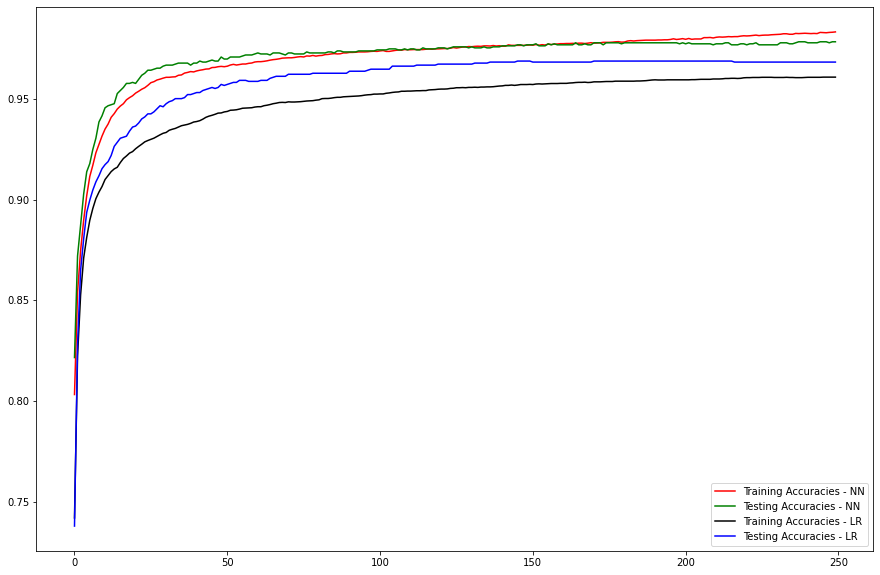

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

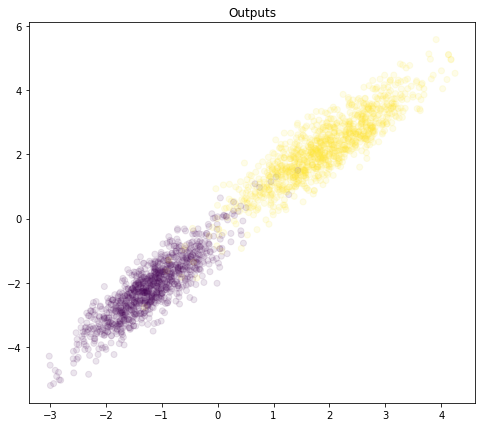

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

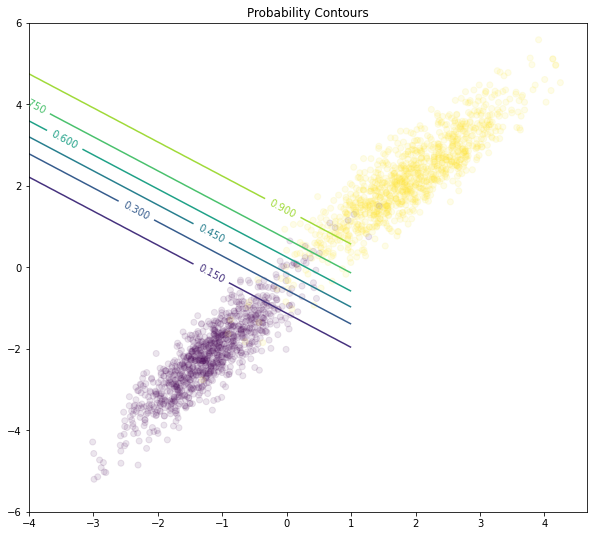

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );